In [33]:
import pandas as pd
from sklearn.cluster import KMeans
from pathlib import Path
import plotly.express as px
import hvplot.pandas

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
from sklearn.decomposition import PCA

In [36]:
file = Path('../Model-Data/unbalanced-data/unsupervised_pca.csv')
df = pd.read_csv(file, index_col='Unnamed: 0', parse_dates=True, infer_datetime_format=True)
df.head()

,Interest Score,HST,XTN,sentiment,Principal Component 1
2020-03-03,7,-0.053440,-0.028093,neutral,-8.775543e+06
2020-03-04,7,0.007057,0.031684,neutral,-8.775510e+06
2020-03-05,7,-0.078486,-0.065194,neutral,-8.775433e+06
2020-03-06,7,0.023574,-0.005379,neutral,-8.775380e+06
2020-03-09,30,-0.103269,-0.085571,neutral,-8.775023e+06


In [37]:
df = pd.get_dummies(df)

In [38]:
df.head()

,Interest Score,HST,XTN,Principal Component 1,sentiment_negative,sentiment_neutral,sentiment_positive
2020-03-03,7,-0.053440,-0.028093,-8.775543e+06,0,1,0
2020-03-04,7,0.007057,0.031684,-8.775510e+06,0,1,0
2020-03-05,7,-0.078486,-0.065194,-8.775433e+06,0,1,0
2020-03-06,7,0.023574,-0.005379,-8.775380e+06,0,1,0
2020-03-09,30,-0.103269,-0.085571,-8.775023e+06,0,1,0


In [39]:
scalar = StandardScaler()
scalar.fit(df)
scaled_data = scalar.transform(df)

In [40]:
scaled_df = pd.DataFrame(data=scaled_data, columns=df.columns.tolist(), index=df.index.tolist())

In [41]:
k = list(range(1,11))

In [42]:
inertias = []
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(scaled_df)
    inertias.append(km.inertia_)

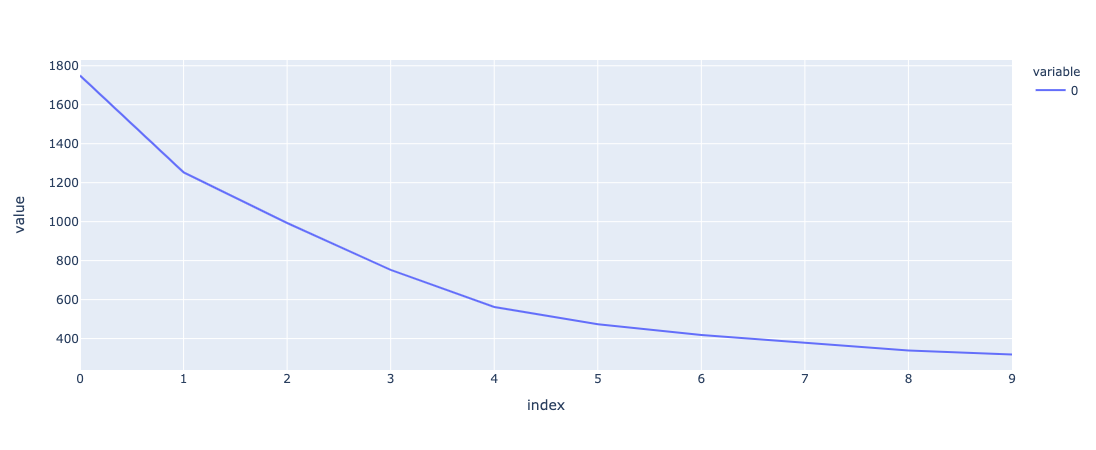

In [43]:
px.line(inertias)

In [44]:
model = KMeans(n_clusters=5)
model.fit(scaled_df)

KMeans(n_clusters=5)

In [45]:
predictions = model.predict(scaled_df)

In [46]:
df['Cluster'] = predictions

In [47]:
df.head()

,Interest Score,HST,XTN,Principal Component 1,sentiment_negative,sentiment_neutral,sentiment_positive,Cluster
2020-03-03,7,-0.053440,-0.028093,-8.775543e+06,0,1,0,2
2020-03-04,7,0.007057,0.031684,-8.775510e+06,0,1,0,4
2020-03-05,7,-0.078486,-0.065194,-8.775433e+06,0,1,0,2
2020-03-06,7,0.023574,-0.005379,-8.775380e+06,0,1,0,2
2020-03-09,30,-0.103269,-0.085571,-8.775023e+06,0,1,0,2


In [48]:
interpret_df = df.copy()

In [49]:
interpret_df['HST'] = df['HST'].apply(lambda x: f'Up {round(x*100,2)}%' if x>0 else f'Down {abs(round(x*100,2))}%')
interpret_df['XTN'] = df['XTN'].apply(lambda x: f'Up {round(x*100,2)}%' if x>0 else f'Down {abs(round(x*100,2))}%')

In [50]:
interpret_df.head()

,Interest Score,HST,XTN,Principal Component 1,sentiment_negative,sentiment_neutral,sentiment_positive,Cluster
2020-03-03,7,Down 5.34%,Down 2.81%,-8.775543e+06,0,1,0,2
2020-03-04,7,Up 0.71%,Up 3.17%,-8.775510e+06,0,1,0,4
2020-03-05,7,Down 7.85%,Down 6.52%,-8.775433e+06,0,1,0,2
2020-03-06,7,Up 2.36%,Down 0.54%,-8.775380e+06,0,1,0,2
2020-03-09,30,Down 10.33%,Down 8.56%,-8.775023e+06,0,1,0,2


In [51]:
interpret_cluster_0_df = interpret_df.loc[interpret_df['Cluster'] == 0]
interpret_cluster_1_df = interpret_df.loc[interpret_df['Cluster'] == 1]
interpret_cluster_2_df = interpret_df.loc[interpret_df['Cluster'] == 2]
interpret_cluster_3_df = interpret_df.loc[interpret_df['Cluster'] == 3]
interpret_cluster_4_df = interpret_df.loc[interpret_df['Cluster'] == 4]

In [52]:
cluster_0_df = df.loc[df['Cluster'] == 0]
cluster_1_df = df.loc[df['Cluster'] == 1]
cluster_2_df = df.loc[df['Cluster'] == 2]
cluster_3_df = df.loc[df['Cluster'] == 3]
cluster_4_df = df.loc[df['Cluster'] == 4]

In [53]:
cluster_0_df.describe()

,Interest Score,HST,XTN,Principal Component 1,sentiment_negative,sentiment_neutral,sentiment_positive,Cluster
count,62.000000,62.000000,62.000000,6.200000e+01,62.0,62.0,62.0,62.0
mean,81.645161,0.003822,0.002963,1.217699e+07,0.0,1.0,0.0,0.0
std,8.613936,0.025301,0.013808,5.724558e+06,0.0,0.0,0.0,0.0
min,64.000000,-0.049123,-0.031024,1.576163e+06,0.0,1.0,0.0,0.0
25%,76.000000,-0.014876,-0.004423,7.076182e+06,0.0,1.0,0.0,0.0
50%,83.000000,0.003984,0.002568,1.295372e+07,0.0,1.0,0.0,0.0
75%,87.000000,0.021038,0.011221,1.769927e+07,0.0,1.0,0.0,0.0
max,100.000000,0.057348,0.036358,1.976423e+07,0.0,1.0,0.0,0.0


In [54]:
def get_avg_vals(df):
    data_list = []
    rows = df.shape[0]
    for col in range(0, len(df.columns.tolist())):
        data = df.iloc[:,[col]].mean().values[0]
        data_list.append(data)
    data_list.append(rows)
    return data_list
    
    

In [55]:
c0_data = get_avg_vals(cluster_0_df)
c1_data = get_avg_vals(cluster_1_df)
c2_data = get_avg_vals(cluster_2_df)
c3_data = get_avg_vals(cluster_3_df)
c4_data = get_avg_vals(cluster_4_df)

In [56]:
df_data = []
df_data.append(c0_data)
df_data.append(c1_data)
df_data.append(c2_data)
df_data.append(c3_data)
df_data.append(c4_data)

In [57]:
columns = df.columns.tolist()
columns.append('Num of Data Points')
cluster_summary_df = pd.DataFrame(data=df_data, columns=columns)

In [58]:
cluster_summary_df

,Interest Score,HST,XTN,Principal Component 1,sentiment_negative,sentiment_neutral,sentiment_positive,Cluster,Num of Data Points
0,81.645161,0.003822,0.002963,1.217699e+07,0.0,1.0,0.0,0.0,62
1,59.029412,-0.003229,0.002400,-9.370990e+05,1.0,0.0,0.0,1.0,34
2,58.857143,-0.025107,-0.014061,-4.905769e+06,0.0,1.0,0.0,2.0,98
3,77.000000,0.009198,-0.002974,4.693112e+06,0.0,0.0,1.0,3.0,3
4,60.509434,0.049890,0.030016,-5.223073e+06,0.0,1.0,0.0,4.0,53


In [59]:
cluster_summary_df['HST'] = cluster_summary_df['HST'].apply(lambda x: f'Up {round(x*100,4)}%' if x>0 else f'Down {abs(round(x*100,2))}%')
cluster_summary_df['XTN'] = cluster_summary_df['XTN'].apply(lambda x: f'Up {round(x*100,4)}%' if x>0 else f'Down {abs(round(x*100,2))}%')
cluster_summary_df['Interest Score'] = cluster_summary_df['Interest Score'].apply(lambda x: round(x,2))

In [60]:
cluster_summary_df.index.name = 'Cluster'

In [61]:
cluster_summary_df.drop(columns=['Cluster'], inplace=True)

In [62]:
cluster_summary_df

,Interest Score,HST,XTN,Principal Component 1,sentiment_negative,sentiment_neutral,sentiment_positive,Num of Data Points
Cluster,,,,,,,,
0,81.65,Up 0.3822%,Up 0.2963%,1.217699e+07,0.0,1.0,0.0,62
1,59.03,Down 0.32%,Up 0.24%,-9.370990e+05,1.0,0.0,0.0,34
2,58.86,Down 2.51%,Down 1.41%,-4.905769e+06,0.0,1.0,0.0,98
3,77.00,Up 0.9198%,Down 0.3%,4.693112e+06,0.0,0.0,1.0,3
4,60.51,Up 4.989%,Up 3.0016%,-5.223073e+06,0.0,1.0,0.0,53


In [63]:
df.hvplot.scatter(x="Principal Component 1", y="Interest Score", by="Cluster")

:NdOverlay   [Cluster]
   :Scatter   [Principal Component 1]   (Interest Score)

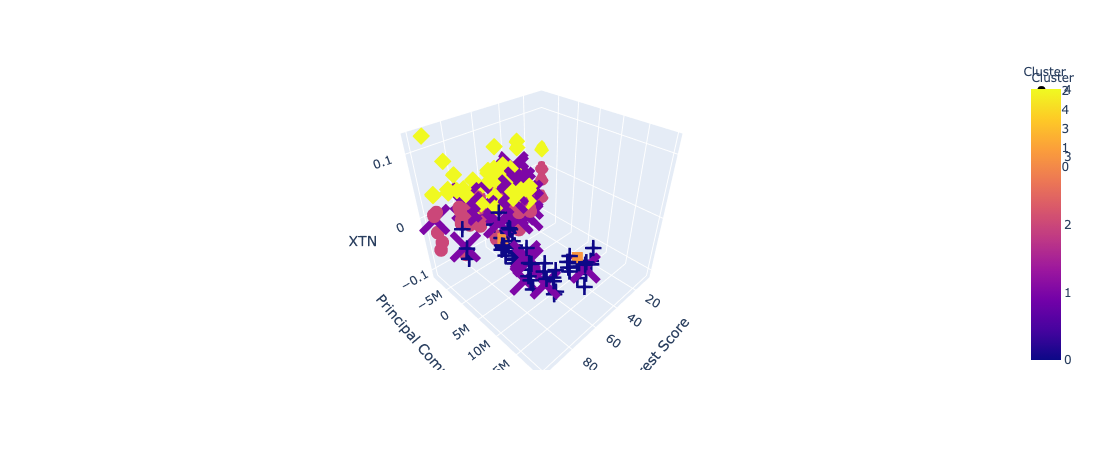

In [64]:
px.scatter_3d(
    df,
    x='Interest Score',
    y='Principal Component 1',
    z='XTN',
    symbol='Cluster',
    color='Cluster',
    width=800
)